# Part 2: Visitor Index Forecasting

This notebook will be broken down into four parts:

1) Exploritory analysis into visitor index data to determine what analysis method is most appropriate, ensuring all data before 2018-03-1 is not null. \
2) Forecasting for one country as a demonstration of the methodology used to forcast.\
3) The process will be automated and run over all countries. \
4) Insights and reccomendations into forcasting results


## Exploritory analysis and data wrangling 

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
whole_data = pd.read_csv('tourist_flows.csv', index_col=0)
whole_data['Date'] = pd.to_datetime(whole_data['Date'])

In [10]:
whole_data.isna().sum()

Date                         0
Nationality                  0
Visitor_Index              117
Seat_Index                 201
Outbound_Index             117
Stock index value          261
Temperature Difference     128
Oil Price                  117
Exchange Rate to USD       117
Google Searches            117
Flight Prices             1199
Trade Flows                869
Visa Policy                117
Vacation Days              171
dtype: int64

In [11]:
Aus = whole_data[whole_data['Nationality']=='Australia']
Aus=Aus.set_index('Date')

In [12]:
whole_data.groupby('Nationality')['Visitor_Index'].describe()

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
Australia,63.0,120.865632,33.159499,62.541317,95.977701,117.772794,142.320302,196.904576
Bahrain,63.0,109.027276,25.383646,46.734155,97.498717,108.150191,122.837995,186.011459
Brazil,63.0,107.469794,35.993349,50.221516,80.392932,103.130306,127.178341,217.571949
Canada,63.0,121.842455,29.838090,70.430206,99.634814,121.116410,142.385753,201.965285
China,63.0,176.924965,80.027415,78.243754,115.688986,157.035385,214.552596,445.284616
Czech Republic,63.0,156.182375,89.746789,40.543294,93.157284,133.545379,193.676777,406.900350
Denmark,63.0,82.275073,38.125089,25.014071,43.344745,89.554179,109.675524,161.879125
Egypt,63.0,113.623595,26.327273,49.788187,94.440702,120.531246,133.291936,161.395333
France,63.0,110.105356,34.174277,45.239291,79.257433,114.177751,134.201713,188.951805


In [13]:
Aus[Aus['Visitor_Index'].isna()==True]

,Nationality,Visitor_Index,Seat_Index,Outbound_Index,Stock index value,Temperature Difference,Oil Price,Exchange Rate to USD,Google Searches,Flight Prices,Trade Flows,Visa Policy,Vacation Days
Date,,,,,,,,,,,,,
2018-04-01,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
whole_data['Visitor_Index'].isnull().groupby([whole_data['Nationality']]).sum().astype(int).reset_index(name='count')

,Nationality,count
0,Australia,3
1,Bahrain,3
2,Brazil,3
3,Canada,3
4,China,3
5,Czech Republic,3
6,Denmark,3
7,Egypt,3
8,France,3
9,Germany,3


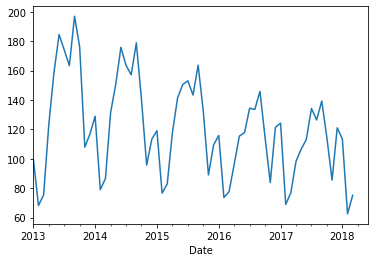

In [15]:
Aus['Visitor_Index'].plot()

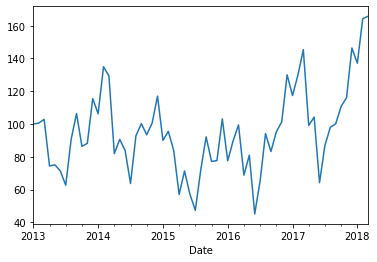

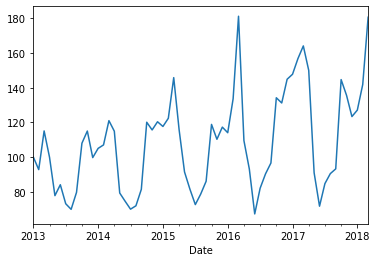

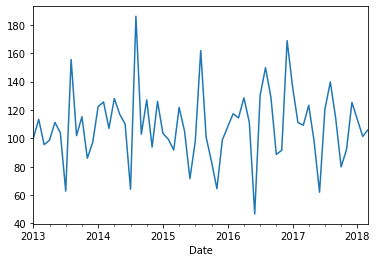

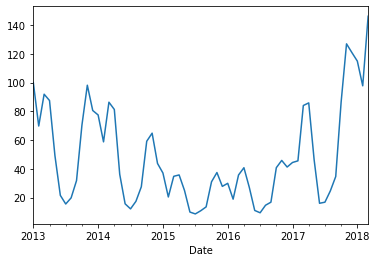

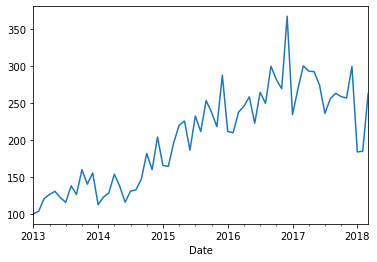

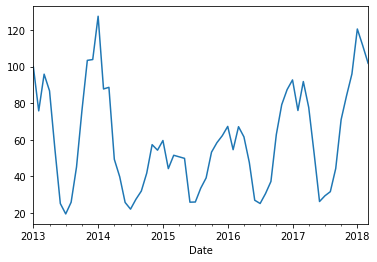

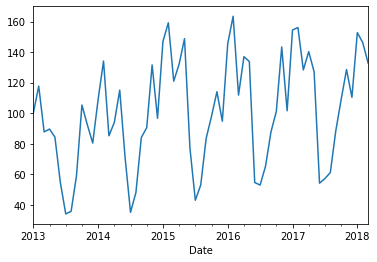

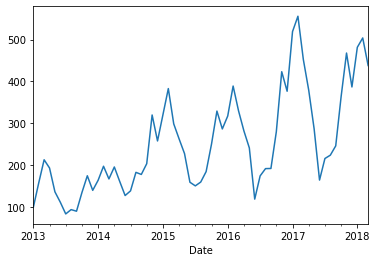

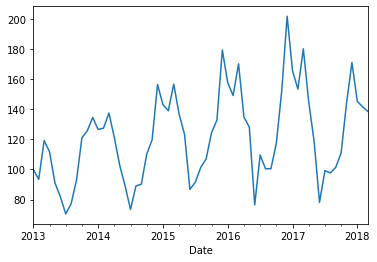

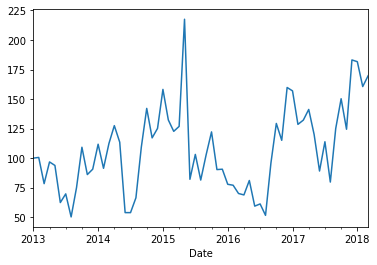

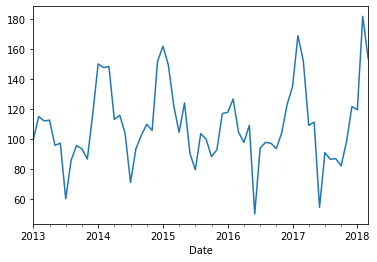

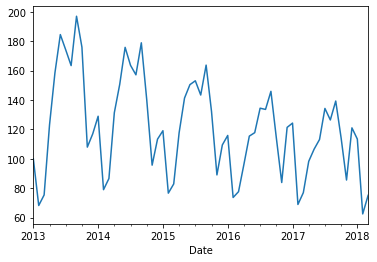

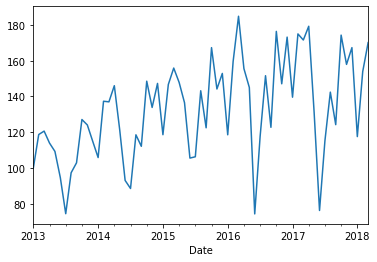

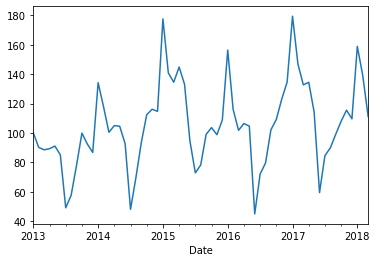

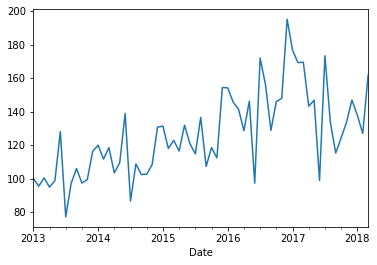

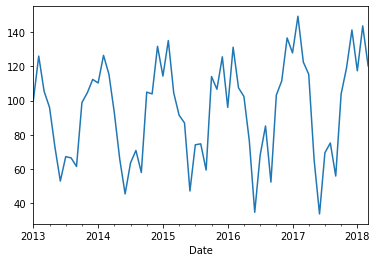

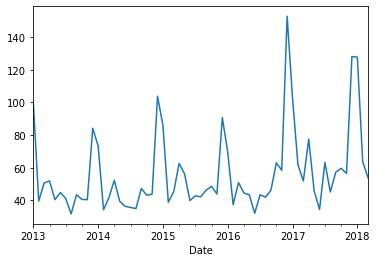

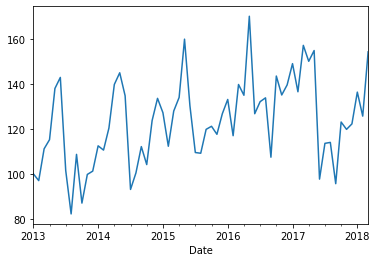

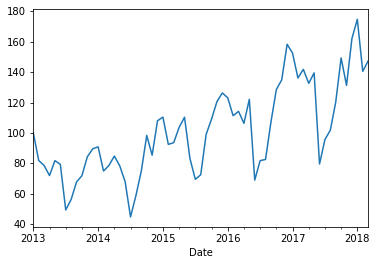

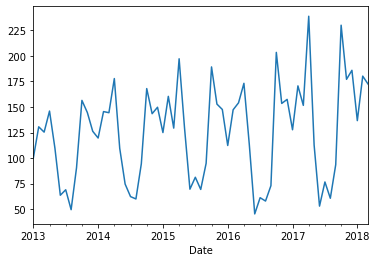

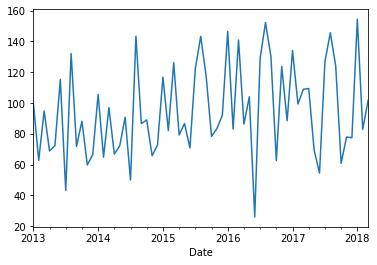

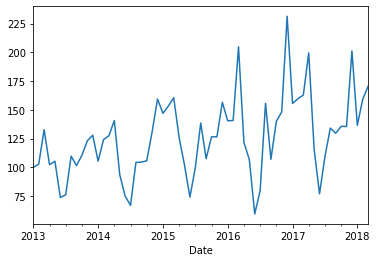

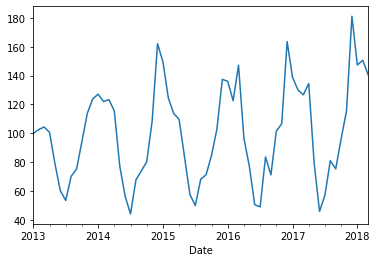

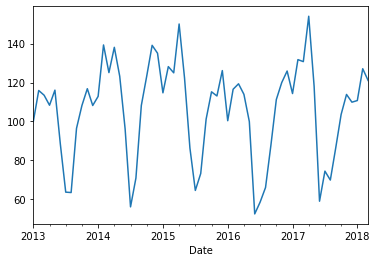

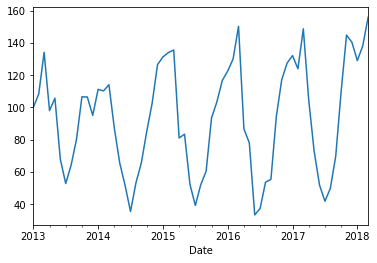

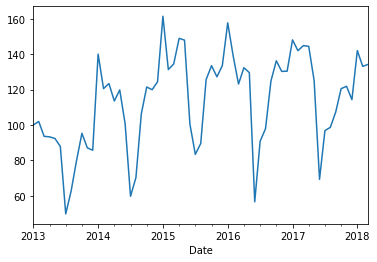

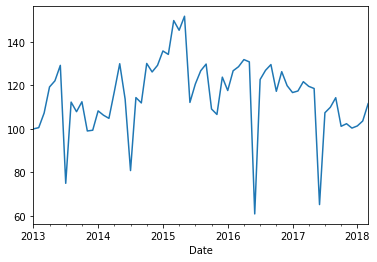

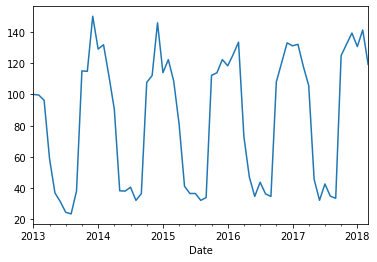

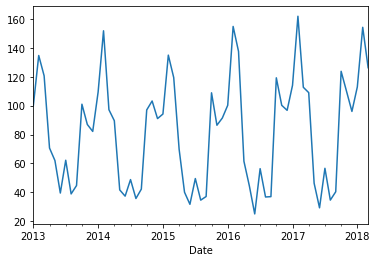

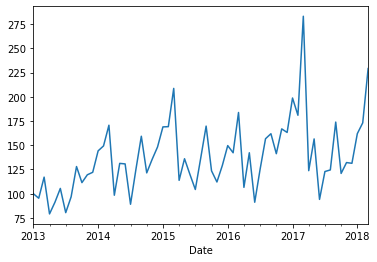

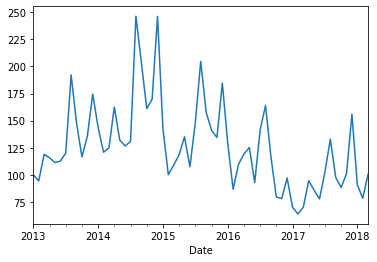

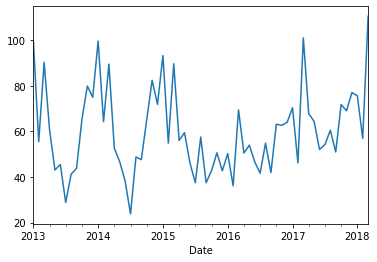

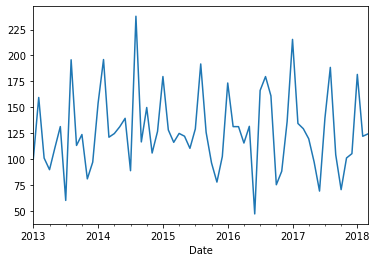

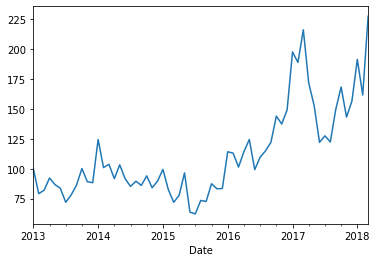

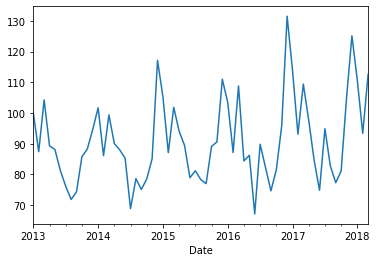

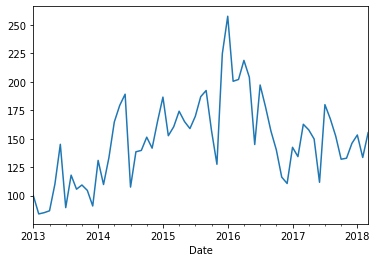

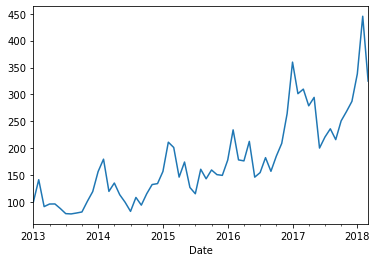

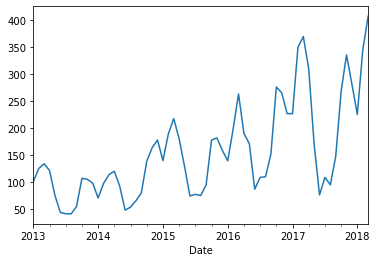

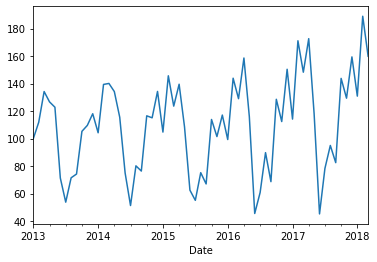

In [16]:
for country in set(whole_data['Nationality'].values):
    whole_data[whole_data['Nationality']==country].set_index('Date')['Visitor_Index'].dropna().plot()
    
    
    plt.show()
    
    

### Results
The data did not appear to have any missing data besides those fields which are to be forecast for, therefore no data wrangling is necessary for the Visitor_Index column.
Secondly the data appears to be highly seasonal in many of the cases therefrore a seasonal arima will be used to forecast future data.

## Demonstration of methodology
Australia will be used in order to demonstate the methods which will later be applied to all other countries.
The steps are as follows: \
2.1) The Dickey-Fuller test and potential differencing to ensure stationarity. \
2.2) p, d and q will be found through bruit force as manually looking through partial plots can not be automated over all countries. \
2.3) Forecasting using seasonal ARIMA 

In [17]:
import math
from statsmodels.tsa.stattools import acf, pacf, adfuller
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import statsmodels.api as sm

#### 2.1) Augmented Dickey-Fuller test

In [18]:
def adf_check(time_series):
    
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test')
    labels = ['ADF Test Statistic', 'p-value','# of lags','Num of Observations used']
    
    for value, label in zip (result, labels):
        print(label+ " : "+str(value))
        
    if result[1]<=0.05:
        print('String evidence against null hypothesis')
        print('reject null hypothesis')
        print('Date has no unit root and is stationary')
    
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Date has unit root and non-stationary')

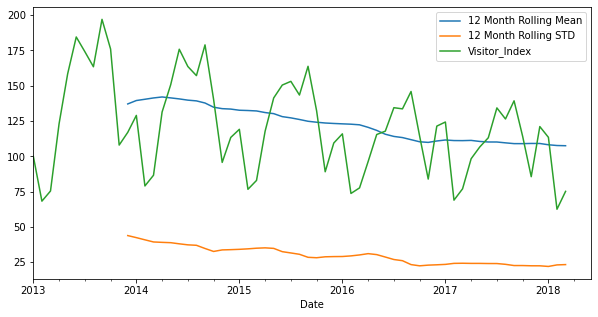

In [19]:
Aus['Visitor_Index'].rolling(12).mean().plot(figsize=(10,5), label='12 Month Rolling Mean')
Aus['Visitor_Index'].rolling(12).std().plot(figsize=(10,5), label='12 Month Rolling STD')
Aus['Visitor_Index'].plot();
plt.legend();

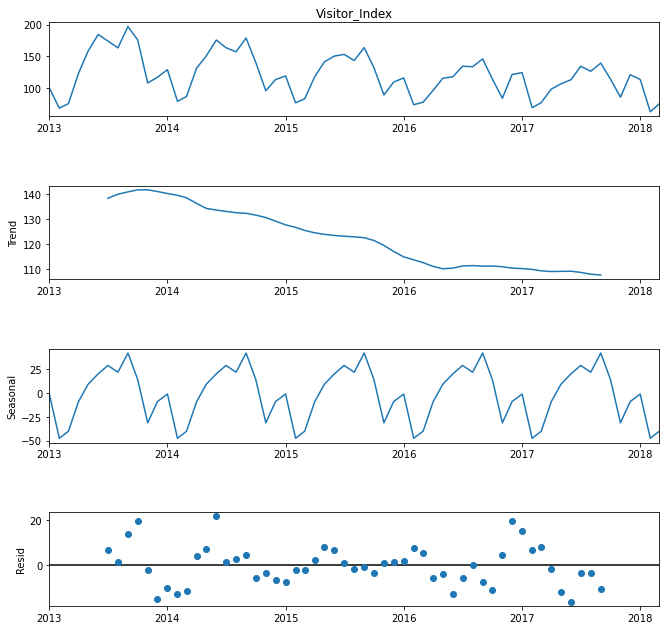

In [20]:
Aus = whole_data[whole_data['Nationality']=='Australia']
Aus=Aus.set_index('Date')
decomp = seasonal_decompose(Aus['Visitor_Index'].dropna())
fig = decomp.plot()
fig.set_size_inches(10,10);

The seasonal decomposition shows a strong seasonality, however it does appear that there is a decreasing trend, therefore differencing may be needed. 

In [21]:
adf_check(Aus['Visitor_Index'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -0.2784967748477715
p-value : 0.9284951011874911
# of lags : 11
Num of Observations used : 51
Weak evidence against null hypothesis
Fail to reject null hypothesis
Date has unit root and non-stationary


As previously speculated the data is not stationary and differencing needs to be applied.

In [22]:
 Aus["Difference 1"] = Aus['Visitor_Index'] - Aus['Visitor_Index'].shift(1)

In [23]:
adf_check(Aus["Difference 1"].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -3.603606644218138
p-value : 0.0056924496263353955
# of lags : 11
Num of Observations used : 50
String evidence against null hypothesis
reject null hypothesis
Date has no unit root and is stationary


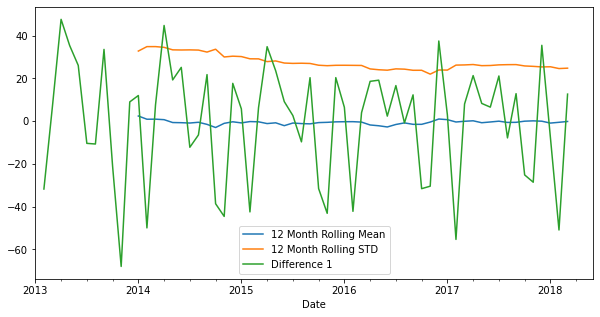

In [24]:
Aus["Difference 1"].rolling(12).mean().plot(figsize=(10,5), label='12 Month Rolling Mean')
Aus["Difference 1"].rolling(12).std().plot(figsize=(10,5), label='12 Month Rolling STD')
Aus["Difference 1"].plot();
plt.legend();

After the first differencing the trend is eliminated and the data is stationary. This is visually confirmed by the plot of the difference.

# Find P, D and Q and seasonal P, D and Q

In [25]:
import statsmodels.api as sm
import itertools

#create list of PDQ combinations
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [26]:
seasonal_pqd = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

The data will be split into training and testing data with 2013 to 2017 being the training data and 2017/2018 being the testing data. The training data will be used to find the optimal P, D and Q and seasonal P, D and Q. These parameters will be used to predict 2017/2018 and compared to the observed data points.

In [446]:
training_data = Aus.loc[:"2017-01-01"]
testing_data = Aus.loc["2017-02-01":"2018-03-01"]

In [447]:
metric_aic_dict = dict()

for pm in pdq:
    for pm_seasonal in seasonal_pqd:
        model = sm.tsa.statespace.SARIMAX(training_data["Difference 1"],
                                            order=pm,
                                            seasonal_order=pm_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        model_aic = model.fit()
        print(f'ARIMA{pm}x{pm_seasonal}12 - AIC:{model_aic.aic}')
        metric_aic_dict.update({(pm, pm_seasonal):model_aic.aic})

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:455.5878577022104
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:808.3050000710796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:269.8598821661073
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:176.33470067563027
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:279.13297310176466
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1078.323832978954
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:182.99886297791198
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:172.9659970999585
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:443.66194876058603
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:754.5351934411165
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:261.78130557960384
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:170.74722146711233
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:278.9677561213035
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:260.73402298536615
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:184.6058768949569
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:170.33241600420783
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:474.7531546537651
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1197.3362161474413
A

In [448]:
minimum_value = min(metric_aic_dict, key=metric_aic_dict.get)
minimum_value

((0, 1, 1), (0, 1, 1, 12))

#### Forecasting with seasonal ARIMA

In [449]:
model = sm.tsa.statespace.SARIMAX(training_data["Visitor_Index"],
                                            order=minimum_value[0],
                                            seasonal_order=minimum_value[1])
model_aic = model.fit()
print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1305      0.152     -0.858      0.391      -0.429       0.168
ma.S.L12       0.1008      0.297      0.340      0.734      -0.480       0.682
sigma2        97.8002     27.766      3.522      0.000      43.380     152.221


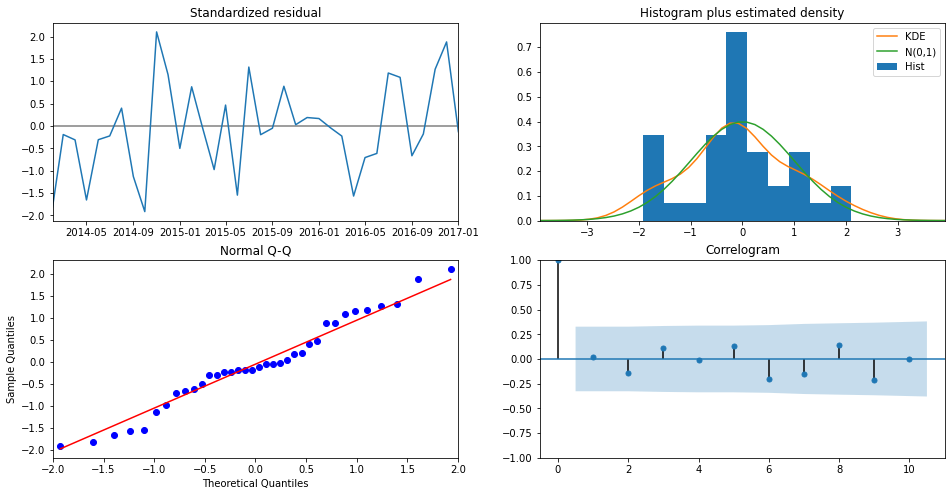

In [450]:
model_aic.plot_diagnostics(figsize=(16,8))
plt.show()

In [454]:
forecast = model_aic.get_prediction(start=pd.to_datetime("2017-02-01"),end=pd.to_datetime("2018-03-01"), dynamic=False)
predictions=forecast.predicted_mean
#forecast = model_aic.get_forecast(steps=3)
actual=testing_data

In [455]:
predictions=forecast.predicted_mean
c1 = forecast.conf_int()

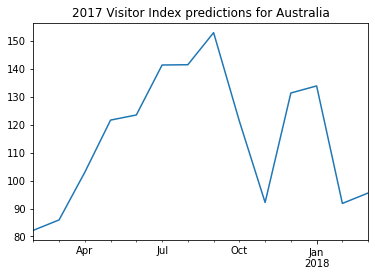

In [466]:
predictions.plot(title ='2017 Visitor Index predictions for Australia');


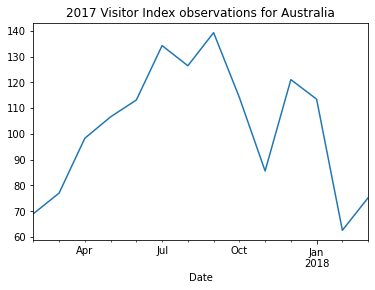

In [464]:
actual['Visitor_Index'].plot(title ='2017 Visitor Index observations for Australia')

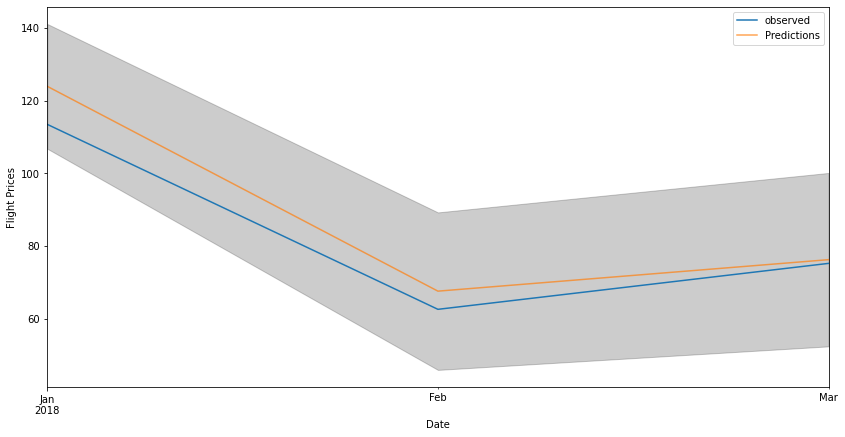

In [72]:
fig = actual['Visitor_Index'].plot(label='observed', figsize=(14,7))
fig.set_xlabel('Date')
fig.set_ylabel('Flight Prices')
fig.fill_between(c1.index,
                c1.iloc[:,0],
                c1.iloc[:,1], color='k', alpha=.2)

##Prediction plot
predictions.plot(ax=fig, label='Predictions', 
               alpha=.7,
               figsize=(14,7))

plt.legend()
plt.show()

### Result
Appear that the prediction is quite accurate being within the 95% confidence interval.

## 3) Apply to all countries

In [35]:
def adf_test(time_series):
    
    result = adfuller(time_series)
        
    if result[1]<=0.05:
        return True
    
    else:
        return False

In [242]:
def find_pdq(input_data, pdq = pdq, seasonal_pqd = seasonal_pqd):

    '''
    Return a tuple containing pdq and seasonal pdq of 
    model with lowest AIC
    '''


    metric_aic_dict = dict()

    for pm in pdq:
        for pm_seasonal in seasonal_pqd:
            model = sm.tsa.statespace.SARIMAX(input_data,
                                            order=pm,
                                            seasonal_order=pm_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            model_aic = model.fit()
            
            metric_aic_dict.update({(pm, pm_seasonal):model_aic.aic})
            
    return min(metric_aic_dict, key=metric_aic_dict.get)

In [243]:
predictions_dict = dict()

In [250]:
def make_forcast(input_data, minimum_value, start_date="2018-04-01", end_date = "2018-06-01"):
    
    
    model = sm.tsa.statespace.SARIMAX(input_data,
                                      order=minimum_value[0],
                                            seasonal_order=minimum_value[1])
    model_aic = model.fit()
    forecast = model_aic.get_prediction(start=pd.to_datetime(start_date),end=pd.to_datetime(end_date), dynamic=False)

    ##predictions and confidence interval
    predictions=forecast.predicted_mean
    c1 = forecast.conf_int()
    return predictions, c1

In [505]:
Find_MSE(Aus, minimum_value)

196.2947326349685

In [521]:
def Find_MSE(input_data, minimum_value):
    
    input_data = input_data.set_index('Date')
    training1 = input_data.loc[:"2017-01-01"]
    testing1 = input_data.loc["2017-02-01":"2017-12-01"].dropna()
    results1 = make_forcast(input_data = training1['Visitor_Index'],
                 minimum_value = minimum_value,
                 start_date="2017-02-01", 
                 end_date = "2017-12-01")
    if len(testing1['Visitor_Index']) >  len(results1[0]):
        list1 = list(testing1['Visitor_Index'])
        del list1[-1]
        list2 = list(results1[0])
        return mean_squared_error(list1, list2)
    elif len(testing1['Visitor_Index']) <  len(results1[0]):
        list1 = list(testing1['Visitor_Index'])
        
        list2 = list(results1[0])
        del list2[-1]
        return mean_squared_error(list1, list2)
    return mean_squared_error(testing1['Visitor_Index'], results1[0])

In [263]:
outside_conf = []
def make_forcast_with_check(input_data, minimum_value, country):
    
    '''
    This function checks whether the prejected confidence interval includes the real value,
    If not it is included in the outside_conf list to be worked on further later.
    '''
    
    input_data = input_data.set_index('Date')
    training_data = input_data.loc[:"2017-12-01"]
    testing_data = input_data.loc["2018-01-01":]
    results1 = make_forcast(input_data = training_data['Visitor_Index'],
                 minimum_value = minimum_value,
                 start_date="2018-01-01", 
                 end_date = "2018-03-01")

    
    if sum(results1[1]['upper Visitor_Index']>testing_data['Visitor_Index'].dropna())==3 and sum(testing_data['Visitor_Index'].dropna()>results1[1]['lower Visitor_Index'])==3:
        results2 = make_forcast(input_data = training_data['Visitor_Index'],
                 minimum_value = minimum_value,
                 start_date="2018-04-01", 
                 end_date = "2018-06-01")
        
        return results2
    
    else: 
        outside_conf.append(country)
        results2 = make_forcast(input_data = training_data['Visitor_Index'],
                 minimum_value = minimum_value,
                 start_date="2018-04-01", 
                 end_date = "2018-06-01")
        return results2

In [253]:
def check_conf(input_data, minimum_value):
    
    input_data = input_data.set_index('Date')
    training_data = input_data.loc[:"2018-01-01"]
    testing_data = input_data.loc["2018-01-01":]
    results1 = make_forcast(input_data = training_data['Visitor_Index'].dropna(),
                 minimum_value = minimum_value,
                 start_date="2018-01-01", 
                 end_date = "2018-03-01")
    
    
    if sum(results1[1]['upper Visitor_Index']>testing_data['Visitor_Index'].dropna())==3 and sum(testing_data['Visitor_Index'].dropna()>results1[1]['lower Visitor_Index'])==3:
        return True
    
    else:
        
        return False

In [467]:
from sklearn.metrics import mean_squared_error

In [522]:
country_data1 = whole_data[whole_data['Nationality']=="Pakistan"]
Find_MSE(country_data, find_pdq(country_data['Visitor_Index']))

75.13896558697412

In [523]:
mse_dict = dict()
for country in set(whole_data['Nationality'].values):
    
    try:
        country_data = whole_data[whole_data['Nationality']==country]
        mse_dict[country] = Find_MSE(country_data, find_pdq(country_data['Visitor_Index']))
    except:
        print(country)

Bahrain
Iraq
Jordan
Pakistan
Netherlands
South Africa
Sudan
Saudi Arabia
Lebanon
Egypt
Syria
Denmark
Iran
Nigeria
Kuwait
Oman
Czech Republic


In [540]:
list(mse_dict.values())

[137.1441800962269,
 843.0362507364123,
 1224.187964089449,
 2869.3973084479903,
 51.02826063478757,
 123.34719682466977,
 11782.672325899139,
 302.21353241358696,
 501.67974516448885,
 29.809688424725643,
 223.26608162411983,
 194.36062624875285,
 501.0505531736406,
 748.564878577113,
 150.87891691216348,
 133.8007806753922,
 116.39996882559494,
 64.49216401602784,
 2073.0063074705486,
 22.110549628869496,
 7734.796492042195,
 75.13896558697412]

In [547]:
np.median(list_of_mse)

137.1441800962269

In [545]:
list_of_mse = []
for name, value in mse_dict.items():
    if name not in countries_no_stable:
        list_of_mse.append(value)

In [528]:
max(mse_dict, key=mse_dict.get)

'Poland'

In [533]:
 mse_dict[max(mse_dict, key=mse_dict.get)]

NameError: name 'mean' is not defined

In [508]:
predictions_dict = dict()
for country in set(whole_data['Nationality'].values):
    
    country_data = whole_data[whole_data['Nationality']==country]
    
    try:
        
        if adf_test(country_data['Visitor_Index'].dropna()) == True:
            
            
            
            print('yes', country)
            
            prediction, confidence_intervals = make_forcast_with_check(country_data, find_pdq(country_data['Visitor_Index']),country)
            #print(prediction, confidence_intervals)
            Find_MSE(country_data, find_pdq(country_data['Visitor_Index']))
            predictions_dict[f'{country}'] = (prediction,confidence_intervals)
            
            
            
        else:
            
            
            
            for i in range(12):
                i+=1
                country_data[f"Difference {i}"] = country_data['Visitor_Index'] - country_data['Visitor_Index'].shift(i)
            
                if adf_test(country_data[f"Difference {i}"].dropna()) == True:
                    minimum1 = find_pdq(country_data[f"Difference {i}"].dropna())
                    prediction, confidence_intervals = make_forcast_with_check(country_data,minimum1 , country)
                    print('Differenced', country)
                    Find_MSE(country_data, minimum1)
                    predictions_dict[f'{country}'] = (prediction,confidence_intervals)
                    
                    break
                elif i==20:
                    predictions_dict[f'{country}'] = ('Unable to stabalise trend')
           

  
    except:
        print('Error', country)
        predictions_dict[f'{country}'] = ('Not enough data')

Differenced Japan
Error Japan
Differenced Ireland
Error Ireland
Error Bahrain
Error Philippines
yes Ukraine
Error Ukraine
Error Turkey
Error Poland
yes Brazil
Error Brazil
Error Iraq
Error Australia
yes United Kingdom
Error United Kingdom
Error Jordan
Error Pakistan
Error Netherlands
Error South Africa
Error Sudan
Error India
Error Switzerland
Error Saudi Arabia
Error Spain
Error Italy
Error Lebanon
Error Germany
yes Egypt
Error Egypt
yes Syria
Error Syria
Error Sweden
Error Denmark
Error Iran
Error Nigeria
Error Kuwait
Error USA
yes Oman
Error Oman
Error China
Error Czech Republic
Error France


In [257]:
new_df = pd.DataFrame()
for key, value in predictions_dict.items():
    country_data = whole_data[whole_data['Nationality']==key].set_index('Date')
    country_data.loc["2018-04-01":"2018-06-01","Visitor_Index"] = value[0]
    #print(value[0])
    country_data = country_data.reset_index()
    new_df = new_df.append(country_data, ignore_index=True, verify_integrity=False, sort=None)

In [258]:
new_df

,Date,Nationality,Visitor_Index,Seat_Index,Outbound_Index,Stock index value,Temperature Difference,Oil Price,Exchange Rate to USD,Google Searches,Flight Prices,Trade Flows,Visa Policy,Vacation Days
0,2013-01-01,Japan,100,100.000000,100.000000,11138.66,16.0,105.10,0.011223,43.00,NaN,-18316.704030,1.0,9.0
1,2013-02-01,Japan,100.55,90.322581,100.000000,11559.36,17.0,107.64,0.010738,51.00,NaN,-8300.510271,1.0,1.0
2,2013-03-01,Japan,102.851,100.000000,100.000000,12397.91,13.0,102.52,0.010552,37.00,NaN,-3765.198453,1.0,8.0
3,2013-04-01,Japan,74.4006,96.774194,100.000000,13860.86,14.0,98.85,0.010219,45.00,NaN,-8980.248548,1.0,8.0
4,2013-05-01,Japan,75.0822,96.494793,100.000000,13774.54,13.0,99.37,0.009906,47.00,NaN,-9807.101878,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,2018-02-01,France,188.952,106.950271,122.529144,5320.49,21.0,63.46,1.221420,81.25,507.908724,-8721.268920,1.0,19.0
2570,2018-03-01,France,159.849,118.726747,122.529144,5167.30,17.0,64.17,1.221420,69.00,505.302813,-6465.380000,1.0,11.0
2571,2018-04-01,France,173.723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2572,2018-05-01,France,118.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
new_df[new_df['Nationality']=='Philippines'].set_index('Date').loc["2018-06-01","Visitor_Index"] =='U'

True

## Result
The vast majority of the countries were able to be stabalised and forecast for using the ARIMA model however for some countries their data was not able to be stabalised therefore a machine learning method should be used to forecast the missing values.

In [372]:
      
visitor_index_dict = dict()

for country in set(whole_data['Nationality'].values):
    
    country_data = new_df[new_df['Nationality']==country].set_index('Date')
    
    try:
        visitor_index_dict[country] = country_data.loc["2018-04-01":"2018-06-01","Visitor_Index"].mean()/country_data.loc["2018-01-01":"2018-03-01","Visitor_Index"].mean()-1
        
            
    except:
        visitor_index_dict[country] = 'U'
        print(country)

Russian Federation
Philippines
Canada
Kazakhstan
South Korea


In [371]:
countries_no_stable = []
for name, value in visitor_index_dict.items():

    if str(value)=='U':
        print(name)
        countries_no_stable.append(name)

Russian Federation
Philippines
Canada
Kazakhstan
South Korea


In [402]:
countries_no_stable.extend(outside_conf)

In [404]:
countries_no_stable = list(set(countries_no_stable))

In [177]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()

In [288]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [298]:
country_data2 = whole_data[whole_data['Nationality']=='Brazil']
date_data = country_data2['Date']
date_data= date_data.reset_index()

country_data3 = pd.DataFrame(impute_it.fit_transform(country_data2.drop(['Nationality','Date'], axis=1))).iloc[:-3,:]
country_data3['Date'] = date_data['Date']
country_data3 = country_data3.set_index('Date')
country_data3.columns = country_data2.drop(['Nationality', "Date"], axis=1).columns
country_data3['Visitor_Index_shifted3'] = country_data3['Visitor_Index'].shift(-3)

country_data3

for i in range(5):
    i+=1
    country_data3[f'{i} days behind'] = country_data3['Visitor_Index'].shift(i)

    
    
    
train_val = country_data3[:"2018-03-01"].dropna()
        
prediction = country_data3.loc["2018-03-01":]

Y = train_val.pop("Visitor_Index_shifted3")
X = train_val
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, shuffle=False)

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

#print(X_train)
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print("XGBoost predictions: ",predictions,"\n")
#predictions
print("SVM predictions: ", regr.predict(X_test),'\n')
print("Observed data points ",y_test)

,Visitor_Index,Seat_Index,Outbound_Index,Stock index value,Temperature Difference,Oil Price,Exchange Rate to USD,Google Searches,Flight Prices,Trade Flows,Visa Policy,Vacation Days,Visitor_Index_shifted3
Date,,,,,,,,,,,,,
2013-01-01,100.000000,100.000000,100.000000,59761.49,0.0,105.10,0.491832,24.00,1324.412818,-4950.000000,0.0,22.0,96.759704
2013-02-01,100.572480,87.483580,100.000000,57424.29,-1.0,107.64,0.506517,30.00,1259.113395,-2098.000000,0.0,2.0,93.798172
2013-03-01,78.384850,96.856821,100.000000,56352.09,3.0,102.52,0.503668,24.00,1228.084697,-735.500000,0.0,2.0,62.375084
2013-04-01,96.759704,93.732408,100.000000,55910.37,8.0,98.85,0.500078,27.00,1250.994732,-1987.100000,0.0,1.0,69.727401
2013-05-01,93.798172,83.036217,100.000000,53506.08,12.0,99.37,0.492243,24.00,1206.624426,-211.700000,0.0,2.0,50.221516
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,124.444367,125.117283,98.868052,71971.00,5.0,59.93,0.306443,54.00,1183.207762,2957.756644,0.0,3.0,160.582586
2017-12-01,183.116870,129.287859,98.868052,76402.10,2.0,61.19,0.303384,66.00,1522.190538,4435.284030,0.0,11.0,169.716136
2018-01-01,181.643232,129.630325,112.178780,84912.70,1.0,66.23,0.302126,61.25,1534.909758,2125.358653,0.0,1.0,NaN


## Results
As can be seen the limited training data points results in very inaccurate results for XGBoost, SVM is slightly better and will therefore be used to make predictions. for the missing data points

In [405]:
countries_no_stable

['Kazakhstan',
 'South Africa',
 'Russian Federation',
 'South Korea',
 'Philippines',
 'India',
 'Canada',
 'China']

In [419]:
score_dict = dict()
prediction_comparison = dict()
for country in countries_no_stable:
    
    country_data1 = whole_data[whole_data['Nationality']==country]
    country_data2 = country_data1.copy()
    date_data = country_data2['Date']
    date_data= date_data.reset_index()

    country_data3 = pd.DataFrame(impute_it.fit_transform(country_data2.drop(['Nationality','Date'], axis=1))).iloc[:-3,:]
    country_data3['Date'] = date_data['Date']
    country_data3 = country_data3.set_index('Date')
    country_data3.columns = country_data2.drop(['Nationality', "Date"], axis=1).columns
    country_data3['Visitor_Index_shifted3'] = country_data3['Visitor_Index'].shift(-3)


    for i in range(5):
        i+=1
        country_data3[f'{i} days behind'] = country_data3['Visitor_Index'].shift(i)

    
    
    seed = 7
    test_size = 0.3
    train_val = country_data3[:"2017-12-01"].dropna()
        
    

    Y_train = train_val.pop("Visitor_Index_shifted3")
    X_train = train_val
    
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=test_size, random_state=seed, shuffle=False)

    regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
    regr.fit(x_train, y_train)
    score_dict[country]=regr.score(x_test, y_test) 
    prediction_comparison[country]=(regr.predict(x_test),  y_test)
    

    prediction = country_data3.loc["2018-01-01":]

    Y_test = prediction.pop("Visitor_Index_shifted3")
    X_test = prediction

    
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, shuffle=False)

    regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
    regr.fit(X_train, Y_train)
    
    
    
    country_data1 = country_data1.set_index('Date')
    country_data1.loc["2018-04-01":"2018-06-01",'Visitor_Index'] = regr.predict(X_test)
    
    predictions_dict['country'] = regr.predict(X_test)
    

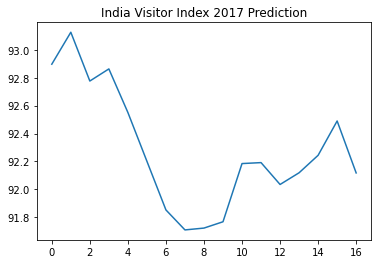

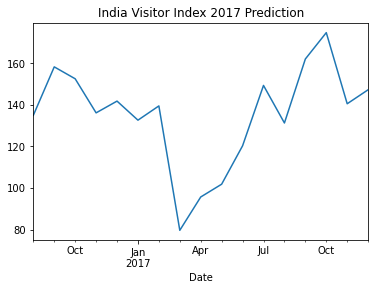

In [518]:

plt.plot(prediction_comparison["India"][0])
plt.title(label = "India Visitor Index 2017 Prediction")
plt.show()
prediction_comparison["India"][1].plot(title = "India Visitor Index 2017 Prediction");

In [413]:
new_df = pd.DataFrame()
for key, value in predictions_dict.items():
    country_data = whole_data[whole_data['Nationality']==key].set_index('Date')
    country_data.loc["2018-04-01":"2018-06-01","Visitor_Index"] = value[0]
    #print(value[0])
    country_data = country_data.reset_index()
    new_df = new_df.append(country_data, ignore_index=True, verify_integrity=False, sort=None)

In [414]:
new_df.to_csv('tourist_flows_with_forecast.csv')

In [415]:

      
visitor_index_dict = dict()

for country in set(whole_data['Nationality'].values):
    
    country_data = new_df[new_df['Nationality']==country].set_index('Date')
    
    try:
        visitor_index_dict[country] = country_data.loc["2018-04-01":"2018-06-01","Visitor_Index"].mean()/country_data.loc["2018-01-01":"2018-03-01","Visitor_Index"].mean()-1
        
            
    except:
        visitor_index_dict[country] = 'U'
        print(country)

In [416]:

      
visitor_index_dict = dict()

for country in set(whole_data['Nationality'].values):
    
    country_data = new_df[new_df['Nationality']==country].set_index('Date')
    
    try:
        visitor_index_dict[country] = country_data.loc["2018-04-01":"2018-06-01","Visitor_Index"].mean()/country_data.loc["2018-01-01":"2018-03-01","Visitor_Index"].mean()-1
        
            
    except:
        visitor_index_dict[country] = 'U'
        print(country)

In [417]:
list1 = list()
for name, value in visitor_index_dict.items():
    list1.append([name,value])

In [418]:
pd.DataFrame(list1).dropna().to_csv('movement.csv') #output so it can be analysed in Tableau